In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

aa_index = {'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7, 'K': 8, 'L': 9, 'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15, 'T': 16, 'V': 17, 'W': 18, 'Y': 19}
aa_list = ["ALA", "CYS", "ASP", "GLU", "PHE", "GLY", "HIS", "ILE", "LYS", "LEU", "MET", "ASN", "PRO", "GLN", "ARG", "SER", "THR", "VAL", "TRP", "TYR"]


# this function helps you to convert the listed data in dataframe into a list (plddt etc.)
def string_to_float_list(string):
    return [float(i) if i!='None' else None for i in string.split(',') ]

# this function helps you to convert the sequence data in dataframe into a list (secondary structure etc.)
def ss_string_to_list(string):
    return [float(i) for i in string.strip('][').split(',')]

def merge_list(list_of_list):
    return [item for sublist in list_of_list for item in sublist]

def filter_function(df):
    filter_list = []
    for i in range(len(df)):
        if df['model_1_ptm_avg_plddt'][i] >= 70 and df['model_2_ptm_avg_plddt'][i] > 70 and df['model_3_ptm_avg_plddt'][i] > 70 and df['model_4_ptm_avg_plddt'][i] > 70 and df['model_5_ptm_avg_plddt'][i] >= 70:
            filter_list.append(True)
        else:
            filter_list.append(False)
    return filter_list

In [2]:
# feature in dataframe:
# ID, name, sequence, sequence_length, structure_avail, [model_name]_avg_plddt
# with model name: disulfide_bond, hydrogen_bond, salt_bridge, surface, SASA, secondary_structure, chirality, phi_angle, psi_angle, omega_angle, plddt

In [8]:
# read data
df_A501 = pd.read_csv('A501_results.tsv', sep='\t')
df_3DAC = pd.read_csv('3DAC_results.tsv', sep='\t')
df_pair = pd.read_csv("A501-3DAC-overall_function-tag.csv")
df_A501_old = pd.read_csv("A501_results_old.csv")
df_3DAC_old = pd.read_csv("3DAC_results_old.csv")

df_A501["name"] = df_A501_old["name"]
df_3DAC["name"] = df_3DAC_old["name"]

df_A501["pLDDT_filter"] = filter_function(df_A501)
df_3DAC["pLDDT_filter"] = filter_function(df_3DAC)

In [9]:
pair_hbond_list_A501 = []
pair_hbond_list_3DAC = []
pair_hbond_per_res_list_A501 = []
pair_hbond_per_res_list_3DAC = []

for i in range(df_pair.shape[0]):
    seq_name_A501 = df_pair["A501_sequence_name"][i]
    seq_name_3DAC = df_pair["3DAC_sequence_name"][i]
    hbond_A501 = df_A501[df_A501["name"] == seq_name_A501]["hydrogen_bond_relaxed_model_3_ptm"].values[0]
    hbond_per_res_A501 = hbond_A501/df_A501[df_A501["name"] == seq_name_A501]["sequence_length"].values[0]
    hbond_3DAC = df_3DAC[df_3DAC["name"] == seq_name_3DAC]["hydrogen_bond_relaxed_model_3_ptm"].values[0]
    hbond_per_res_3DAC = hbond_3DAC/df_3DAC[df_3DAC["name"] == seq_name_3DAC]["sequence_length"].values[0]
    pair_hbond_list_A501.append(hbond_A501)
    pair_hbond_list_3DAC.append(hbond_3DAC)
    pair_hbond_per_res_list_A501.append(hbond_per_res_A501)
    pair_hbond_per_res_list_3DAC.append(hbond_per_res_3DAC)

df_pair["A501_hydrogen_bond"] = pair_hbond_list_A501
df_pair["3DAC_hydrogen_bond"] = pair_hbond_list_3DAC
df_pair["diff_hydrogen_bond"] = df_pair["A501_hydrogen_bond"] - df_pair["3DAC_hydrogen_bond"]
df_pair["A501_per_res_hydrogen_bond"] = pair_hbond_per_res_list_A501
df_pair["3DAC_per_res_hydrogen_bond"] = pair_hbond_per_res_list_3DAC
df_pair["diff_per_res_hydrogen_bond"] = df_pair["A501_per_res_hydrogen_bond"] - df_pair["3DAC_per_res_hydrogen_bond"]

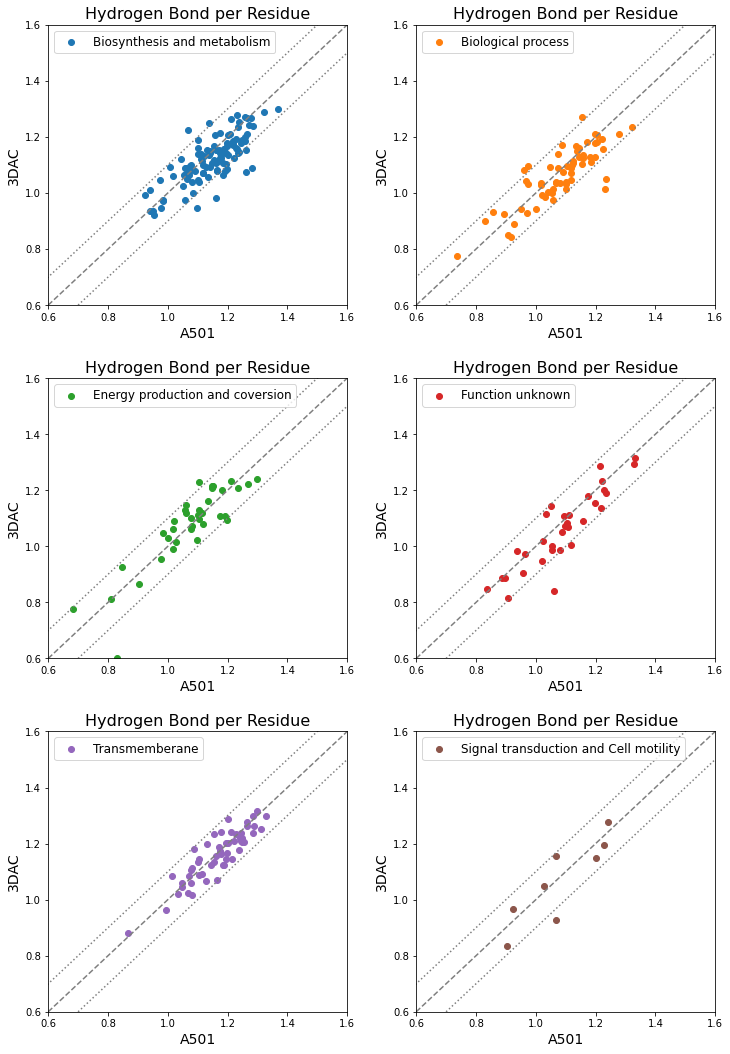

In [10]:
plt.figure(figsize=(10.5,15))

plt.subplot(321)
plt.scatter(df_pair[df_pair["Function-tag"]=="Biosynthesis and metabolism"]["A501_per_res_hydrogen_bond"],
            df_pair[df_pair["Function-tag"]=="Biosynthesis and metabolism"]["3DAC_per_res_hydrogen_bond"],
            label="Biosynthesis and metabolism",
            color="tab:blue")
plt.plot([0.6,1.6],[0.6,1.6],linestyle="--",color="tab:gray")
plt.plot([0.6+0.1,1.6],[0.6,1.6-0.1],linestyle=":",color="tab:gray")
plt.plot([0.6-0.1,1.6],[0.6,1.6+0.1],linestyle=":",color="tab:gray")
plt.xlim(0.6,1.6)
plt.ylim(0.6,1.6)
plt.legend(loc="upper left",fontsize=12)
plt.xlabel("A501",fontsize=14)
plt.ylabel("3DAC",fontsize=14)
plt.title("Hydrogen Bond per Residue",fontsize=16)


plt.subplot(322)
plt.scatter(df_pair[df_pair["Function-tag"]=="Biological process"]["A501_per_res_hydrogen_bond"],
            df_pair[df_pair["Function-tag"]=="Biological process"]["3DAC_per_res_hydrogen_bond"],
            label="Biological process",
            color="tab:orange")
plt.plot([0.6,1.6],[0.6,1.6],linestyle="--",color="tab:gray")
plt.plot([0.6+0.1,1.6],[0.6,1.6-0.1],linestyle=":",color="tab:gray")
plt.plot([0.6-0.1,1.6],[0.6,1.6+0.1],linestyle=":",color="tab:gray")
plt.xlim(0.6,1.6)
plt.ylim(0.6,1.6)
plt.legend(loc="upper left",fontsize=12)
plt.xlabel("A501",fontsize=14)
plt.ylabel("3DAC",fontsize=14)
plt.title("Hydrogen Bond per Residue",fontsize=16)


plt.subplot(323)
plt.scatter(df_pair[df_pair["Function-tag"]=="Energy production and coversion"]["A501_per_res_hydrogen_bond"],
            df_pair[df_pair["Function-tag"]=="Energy production and coversion"]["3DAC_per_res_hydrogen_bond"],
            label="Energy production and coversion",
            color="tab:green")
plt.plot([0.6,1.6],[0.6,1.6],linestyle="--",color="tab:gray")
plt.plot([0.6+0.1,1.6],[0.6,1.6-0.1],linestyle=":",color="tab:gray")
plt.plot([0.6-0.1,1.6],[0.6,1.6+0.1],linestyle=":",color="tab:gray")
plt.xlim(0.6,1.6)
plt.ylim(0.6,1.6)
plt.legend(loc="upper left",fontsize=12)
plt.xlabel("A501",fontsize=14)
plt.ylabel("3DAC",fontsize=14)
plt.title("Hydrogen Bond per Residue",fontsize=16)


plt.subplot(324)
plt.scatter(df_pair[df_pair["Function-tag"]=="Function unknown"]["A501_per_res_hydrogen_bond"],
            df_pair[df_pair["Function-tag"]=="Function unknown"]["3DAC_per_res_hydrogen_bond"],
            label="Function unknown",
            color="tab:red")
plt.plot([0.6,1.6],[0.6,1.6],linestyle="--",color="tab:gray")
plt.plot([0.6+0.1,1.6],[0.6,1.6-0.1],linestyle=":",color="tab:gray")
plt.plot([0.6-0.1,1.6],[0.6,1.6+0.1],linestyle=":",color="tab:gray")
plt.xlim(0.6,1.6)
plt.ylim(0.6,1.6)
plt.legend(loc="upper left",fontsize=12)
plt.xlabel("A501",fontsize=14)
plt.ylabel("3DAC",fontsize=14)
plt.title("Hydrogen Bond per Residue",fontsize=16)


plt.subplot(325)
plt.scatter(df_pair[df_pair["Function-tag"]=="Transmemberane"]["A501_per_res_hydrogen_bond"],
            df_pair[df_pair["Function-tag"]=="Transmemberane"]["3DAC_per_res_hydrogen_bond"],
            label="Transmemberane",
            color="tab:purple")
plt.plot([0.6,1.6],[0.6,1.6],linestyle="--",color="tab:gray")
plt.plot([0.6+0.1,1.6],[0.6,1.6-0.1],linestyle=":",color="tab:gray")
plt.plot([0.6-0.1,1.6],[0.6,1.6+0.1],linestyle=":",color="tab:gray")
plt.xlim(0.6,1.6)
plt.ylim(0.6,1.6)
plt.legend(loc="upper left",fontsize=12)
plt.xlabel("A501",fontsize=14)
plt.ylabel("3DAC",fontsize=14)
plt.title("Hydrogen Bond per Residue",fontsize=16)


plt.subplot(326)
plt.scatter(df_pair[df_pair["Function-tag"]=="Signal transduction and Cell motility"]["A501_per_res_hydrogen_bond"],
            df_pair[df_pair["Function-tag"]=="Signal transduction and Cell motility"]["3DAC_per_res_hydrogen_bond"],
            label="Signal transduction and Cell motility",
            color="tab:brown")
plt.plot([0.6,1.6],[0.6,1.6],linestyle="--",color="tab:gray")
plt.plot([0.6+0.1,1.6],[0.6,1.6-0.1],linestyle=":",color="tab:gray")
plt.plot([0.6-0.1,1.6],[0.6,1.6+0.1],linestyle=":",color="tab:gray")
plt.xlim(0.6,1.6)
plt.ylim(0.6,1.6)
plt.legend(loc="upper left",fontsize=12)
plt.xlabel("A501",fontsize=14)
plt.ylabel("3DAC",fontsize=14)
plt.title("Hydrogen Bond per Residue",fontsize=16)

plt.tight_layout(pad=2)
plt.savefig("Hbond_full.png",dpi=300)